In [1]:
from keras.layers import Input, Lambda, Dense, Flatten,BatchNormalization, Dropout
from keras.models import Model
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

2022-10-26 17:15:15.168830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 17:15:15.300206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 17:15:15.300247: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-26 17:15:15.324179: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 17:15:15.990145: W tensorflow/stream_executor/platform/de

In [2]:
!ls '../images'

'Age related Macular Degeneration'   Diabetes   Hypertension   Normal
 Cataract			     Glaucoma   Myopia	      'Other diseases'


In [3]:
#Give dataset path


In [4]:
#Constant Variable
folder_path = '../images'
IMAGE_SIZE  = 224
BATCH_SIZE  = 16
EPOCH       = 1
CLASS_NAME  = ['Age related Macular Degeneration', 'Cataract', 'Diabetes', 'Glaucoma', 'Hypertension','Myopia', 'Normal', 'Other diseases']
MODEL_NAME  = 'mymodel.h5'

Working with 2816 images
Image examples: 
1515_right-N.jpg


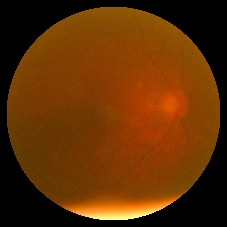

896_left-N.jpg


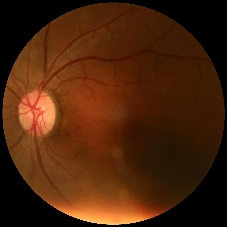

172_right-N.jpg


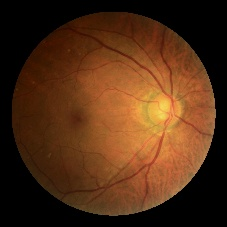

3256_right-N.jpg


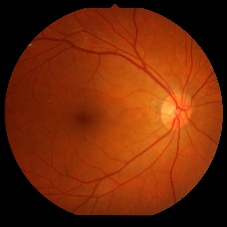

85_left-N.jpg


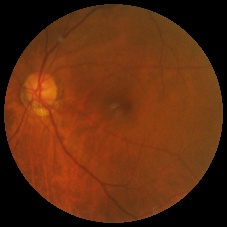

3342_left-N.jpg


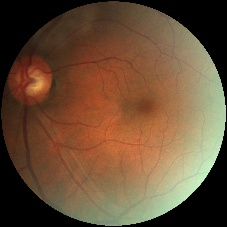

2834_right-N.jpg


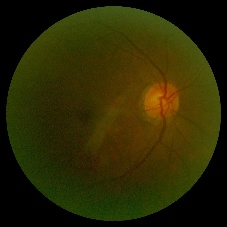

3423_left-N.jpg


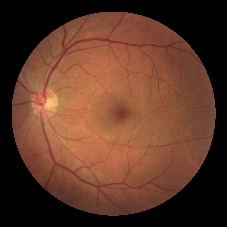

2881_left-N.jpg


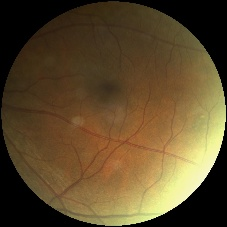

2830_right-N.jpg


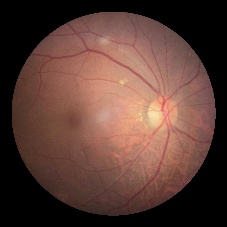

In [5]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = folder_path+'/Normal'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [6]:
folders = glob(folder_path+'/*')
print(len(folders))

8


In [7]:
model = keras.models.load_model(MODEL_NAME)
model.summary()

2022-10-26 17:15:17.924955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-26 17:15:17.924999: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-26 17:15:17.925025: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (170-187-231-106.ip.linodeusercontent.com): /proc/driver/nvidia/version does not exist
2022-10-26 17:15:17.925266: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3,
    fill_mode='nearest')

In [9]:
train_set = train_datagen.flow_from_directory(folder_path,
                                                 target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical',
                                                 subset='training')

Found 4216 images belonging to 8 classes.


In [10]:
test_set = train_datagen.flow_from_directory(folder_path,
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 1802 images belonging to 8 classes.


In [11]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)
callbacks = [checkpoint]

In [12]:
start = datetime.now()
model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=EPOCH,
  steps_per_epoch=5,
  validation_steps=32,
  callbacks=callbacks,
  use_multiprocessing=True,
  verbose=2)
duration = datetime.now() - start
print("\nTraining completed in time: ", duration)


Epoch 1: val_loss improved from inf to 1.61428, saving model to mymodel.h5
5/5 - 227s - loss: 1.8403 - accuracy: 0.4250 - val_loss: 1.6143 - val_accuracy: 0.4160 - 227s/epoch - 45s/step

Training completed in time:  0:04:22.450663


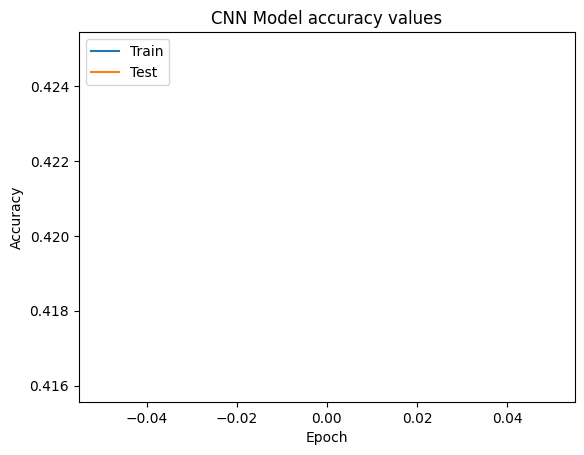

In [13]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
from datetime import datetime
model_date = datetime.today().strftime('%Y-%m-%d')

In [15]:
!tensorflowjs_converter --input_format=keras $MODEL_NAME ../assets/model/$model_date

2022-10-26 17:19:42.529203: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 17:19:42.568231: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-26 17:19:43.213528: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-26 17:19:43.213667: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-10-26 17:19:43.213689: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Ca

In [16]:
import requests
r = requests.post( url= "https://170-187-231-106.ip.linodeusercontent.com/EyeCare/m.php", data={"tgl":model_date},timeout=0.5)
r.text

'Operasi Berhasil'